# Etape 2 <a id="etap2"></a>

Dimensions du jeu données : 

**8457 rows × 77 columns**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from scikitplot.metrics import plot_cumulative_gain, plot_confusion_matrix, plot_roc
import import_ipynb
import proj_func

importing Jupyter notebook from proj_func.ipynb


In [2]:
df = pd.read_csv('data_rci.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,def12_31,MT_PREST_CAT_150,MT_PREST_CAT_autre,"age_cli_par_DUREE_CAT_(0, 1]","age_cli_par_DUREE_CAT_(1, .]","PRIX_TOTAL_CAT_(0, 20000]","PRIX_TOTAL_CAT_(20000, .]","pc_appo_CAT_(0, 22]","pc_appo_CAT_(22, .]","MT_FINANCE_CAT_(0,9000]",...,MT_PREST,MT_ASSUR,age_cli,pc_appo,PRIX_TOTAL,MENS_par_FINANCE,DUREE_C_par_FINANCE,PREST_par_FINANCE,ASSUR_par_FINANCE,age_cli_par_DUREE
0,0,0,1,0,1,0,1,1,0,0,...,0.0,0.0,28,0,39169.28,0.004851,0.000306,0.000000,0.000000,4.666667
1,0,1,0,0,1,1,0,1,0,0,...,150.0,0.0,64,12,19268.00,0.021002,0.004034,0.010086,0.000000,1.066667
2,0,1,0,1,0,0,1,1,0,0,...,150.0,0.0,51,19,23969.00,0.020517,0.003731,0.009328,0.000000,0.850000
3,0,1,0,1,0,0,1,0,1,0,...,150.0,0.0,42,41,24793.50,0.021002,0.005793,0.014484,0.000000,0.700000
4,0,1,0,1,0,0,1,1,0,0,...,150.0,395.0,34,19,31597.44,0.019456,0.002257,0.009404,0.024764,0.944444


## Resampling with SMOTE



In [3]:
X = df.iloc[:, df.columns != 'def12_31']
y = df.iloc[:, df.columns == 'def12_31'].squeeze()
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (8457, 76)
Shape of y: (8457,)


In [4]:
#Cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5919, 76)
Number transactions y_train dataset:  (5919,)
Number transactions X_test dataset:  (2538, 76)
Number transactions y_test dataset:  (2538,)


In [5]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


Before OverSampling, counts of label '1': 68
Before OverSampling, counts of label '0': 5851 



In [6]:
#feature scaling

scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#X_train = pd.DataFrame(preprocessing.scale(X_train), columns=X_train.columns)
#X_test = pd.DataFrame(preprocessing.scale(X_test), columns= X_test.columns)

In [7]:
sm = SMOTE(random_state = 2, sampling_strategy = 'minority')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (11702, 76)
After OverSampling, the shape of train_y: (11702,) 

After OverSampling, counts of label '1': 5851
After OverSampling, counts of label '0': 5851


## La regression logistique

### GridSearch

In [8]:
y_train_res = y_train_res.astype('int32')

In [9]:
param = {
    'penalty': ('none', 'l1', 'l2', 'elasticnet'),
    'C': (0.001, 0.01, 0.1, 1, 10, 100),
    'solver': ('newton-cg', 'lbfgs', 'sag','liblinear', 'saga')
}
    
clf = GridSearchCV(LogisticRegression(class_weight = 'balanced'),
                   param,
                   cv = 5,
                   verbose = 5,
                   scoring = ('precision', 'recall', 'f1'),
                   refit = 'f1',
                   n_jobs = -1
                  )
clf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.7min finished
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to th

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10, 100),
                         'penalty': ('none', 'l1', 'l2', 'elasticnet'),
                         'solver': ('newton-cg', 'lbfgs', 'sag', 'liblinear',
                                    'saga')},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             s

In [23]:
res = pd.DataFrame(clf.cv_results_)
res.sort_values(by = 'rank_test_f1')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_precision,split1_test_precision,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
81,0.598256,9.553186e-02,0.013192,0.001165,10,none,lbfgs,"{'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}",0.769169,0.743223,...,0.012980,14,0.795211,0.789916,0.796274,0.800160,0.788052,0.793922,0.004395,1
1,0.603455,3.929438e-02,0.013592,0.001624,0.001,none,lbfgs,"{'C': 0.001, 'penalty': 'none', 'solver': 'lbf...",0.769169,0.743223,...,0.012980,14,0.795211,0.789916,0.796274,0.800160,0.788052,0.793922,0.004395,1
61,0.625243,7.288611e-02,0.014393,0.001018,1,none,lbfgs,"{'C': 1, 'penalty': 'none', 'solver': 'lbfgs'}",0.769169,0.743223,...,0.012980,14,0.795211,0.789916,0.796274,0.800160,0.788052,0.793922,0.004395,1
41,0.604629,2.706249e-02,0.013990,0.001415,0.1,none,lbfgs,"{'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}",0.769169,0.743223,...,0.012980,14,0.795211,0.789916,0.796274,0.800160,0.788052,0.793922,0.004395,1
101,0.653825,8.271081e-02,0.013990,0.003631,100,none,lbfgs,"{'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}",0.769169,0.743223,...,0.012980,14,0.795211,0.789916,0.796274,0.800160,0.788052,0.793922,0.004395,1
21,0.635908,6.645693e-02,0.015379,0.002323,0.01,none,lbfgs,"{'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'}",0.769169,0.743223,...,0.012980,14,0.795211,0.789916,0.796274,0.800160,0.788052,0.793922,0.004395,1
91,0.548886,4.707810e-02,0.015990,0.005364,10,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.769784,0.741548,...,0.013215,14,0.795539,0.788969,0.796761,0.800160,0.787556,0.793797,0.004787,7
89,5.930798,2.760044e-01,0.010995,0.001266,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.769784,0.742299,...,0.013548,5,0.795539,0.789768,0.796761,0.800319,0.786590,0.793796,0.004950,8
88,5.954585,2.060185e+00,0.013593,0.002576,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.769231,0.741548,...,0.013873,21,0.794045,0.788969,0.797084,0.800957,0.787730,0.793757,0.004945,9
68,11.835647,4.235345e+00,0.018391,0.004361,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.769416,0.739521,...,0.013601,5,0.794543,0.788193,0.795464,0.801435,0.789043,0.793736,0.004810,10


In [24]:
feats = ['param_C', 'param_penalty', 'param_solver', 'mean_test_precision', \
'mean_test_recall','mean_test_f1', 'rank_test_f1']
res[feats].sort_values('rank_test_f1').head(50)


,param_C,param_penalty,param_solver,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_f1
81,10,none,lbfgs,0.755040,0.837292,0.793922,1
1,0.001,none,lbfgs,0.755040,0.837292,0.793922,1
61,1,none,lbfgs,0.755040,0.837292,0.793922,1
41,0.1,none,lbfgs,0.755040,0.837292,0.793922,1
101,100,none,lbfgs,0.755040,0.837292,0.793922,1
21,0.01,none,lbfgs,0.755040,0.837292,0.793922,1
91,10,l2,lbfgs,0.754827,0.837292,0.793797,7
89,10,l1,saga,0.754548,0.837634,0.793796,8
88,10,l1,liblinear,0.754903,0.837121,0.793757,9
68,1,l1,liblinear,0.754459,0.837634,0.793736,10


In [25]:
clf.best_params_

{'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  

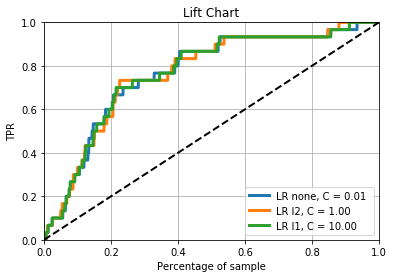

In [26]:
arg_models = [
    LogisticRegression(solver='newton-cg', C=0.01, penalty='none', max_iter=10000),
    LogisticRegression(solver='newton-cg', C=1, penalty='l2', max_iter=10000),
    LogisticRegression(solver='liblinear', C=10, penalty='l1', max_iter=10000),
]

fig = proj_func.plot_several_lifts(arg_models, X_train, X_test, y_train, y_test)

In [27]:
lr = LogisticRegression(C=1, penalty='l1', verbose = 5, solver = 'liblinear')
lr.fit(X_train_res, y_train_res)

[LibLinear]

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=5,
                   warm_start=False)

In [28]:
y_pre = lr.predict(X_test)
y_pre

array([0, 1, 1, ..., 0, 0, 0])

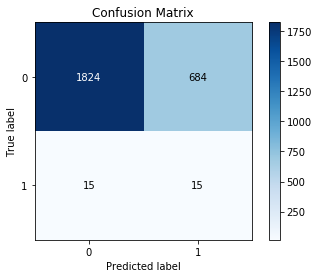

In [29]:
y_test = y_test.astype('int32')

#print("accuracy metric in the testing dataset:", accuracy_score(y_test, y_pre))
#print("Precision metric in the testing dataset:", precision_score(y_test, y_pre))
#print("Recall metric in the testing dataset:", recall_score(y_test, y_pre))
#print("f1 metric in the testing dataset:", f1_score(y_test, y_pre))
plot_confusion_matrix(y_test, y_pre)

D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


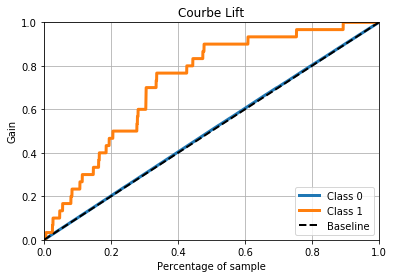

In [30]:
predicted_proba = lr.predict_proba(X_test)
plot_cumulative_gain(y_test, predicted_proba, title='Courbe Lift')

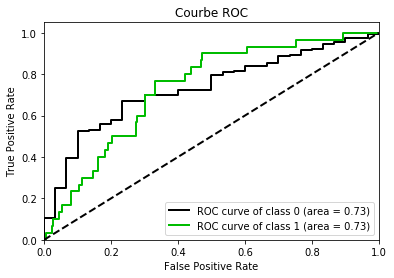

In [31]:
plot_roc(y_test, predicted_proba, plot_micro = False, plot_macro = False, title = 'Courbe ROC')

In [32]:
coef = pd.DataFrame(np.abs(lr.coef_[0,:]))
index = coef.sort_values(by=0, ascending = False).head(10).index
coef.sort_values(by=0, ascending = False).head(5)

,0
65,3.108344
69,1.643164
75,1.281715
56,1.068279
62,1.007559


In [33]:
lr.coef_[0,62]

-1.0075589219132692

In [34]:
#les variables les plus importants
df.columns[index]
#VR_BALLON: 3.1
#age_cli: -1.7
#ASSUR_PAR_FINANCE: 1.3
#anciennete_rci_2: -1.0
#MT_APPORT: -1.0

Index(['VR_BALLON', 'age_cli', 'ASSUR_par_FINANCE', 'anciennete_rci_2',
       'MT_APPORT', 'DUREE_CONTRAT_CAT_(30, 40]', 'VR_BALLON_CAT_>0',
       'PRIX_TOTAL', 'DUREE_CONTRAT_CAT_(0,30]', 'PREST_par_FINANCE'],
      dtype='object')

In [22]:
lift = proj_func.lift_table(lr, X_train, X_test, y_train, y_test)
lift

[LibLinear]

,alpha,effectif,nb_positif,pc_positif,alpha_lift,cum_effectif,cum_positif,cum_alpha_lift
0,0.1,254,11,4.330709,3.663780,254,11,3.663780
1,0.2,254,7,2.755906,2.331496,508,18,2.997638
2,0.3,254,5,1.968504,1.665354,762,23,2.553543
3,0.4,254,1,0.393701,0.333071,1016,24,1.998425
4,0.5,254,3,1.181102,0.999213,1270,27,1.798583
5,0.6,254,1,0.393701,0.333071,1524,28,1.554331
6,0.7,254,0,0.000000,0.000000,1778,28,1.332283
7,0.8,254,1,0.393701,0.333071,2032,29,1.207382
8,0.9,254,1,0.393701,0.333071,2286,30,1.110236
9,1.0,254,0,0.000000,0.000000,2540,30,0.999213
